In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statistics



In [30]:
df=pd.read_csv("Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [31]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [33]:
df.shape

(300153, 12)

In [34]:
print("Missing values before preprocessing:")
print(df.isnull().sum())


Missing values before preprocessing:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [35]:
df['duration'].fillna(df['duration'].mean(), inplace=True)
df["duration"]

0          2.17
1          2.33
2          2.17
3          2.25
4          2.33
          ...  
300148    10.08
300149    10.42
300150    13.83
300151    10.00
300152    10.08
Name: duration, Length: 300153, dtype: float64

In [36]:
# Check and handle duplicates
df.drop_duplicates(inplace=True)


next we will find out the most popular airline

from this we can tell that indigo is the most popular airline

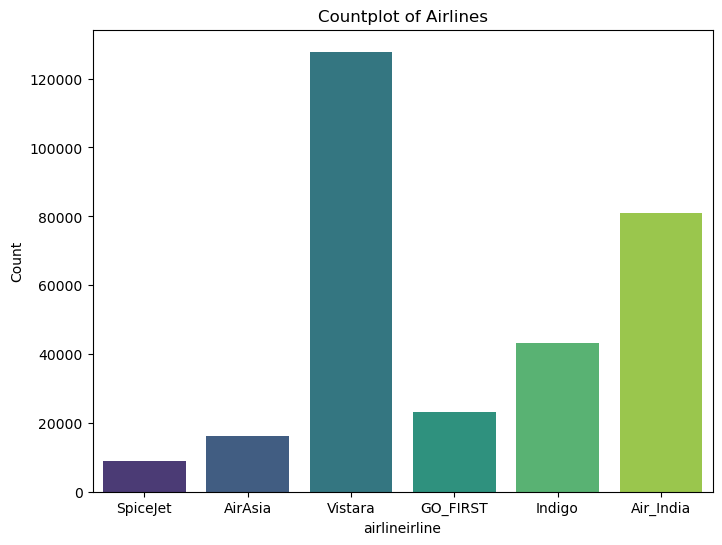

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='airline', data=df, palette='viridis')


plt.xlabel('airlineirline')
plt.ylabel('Count')
plt.title('Countplot of Airlines')


plt.show()

from this we can see that

In [38]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

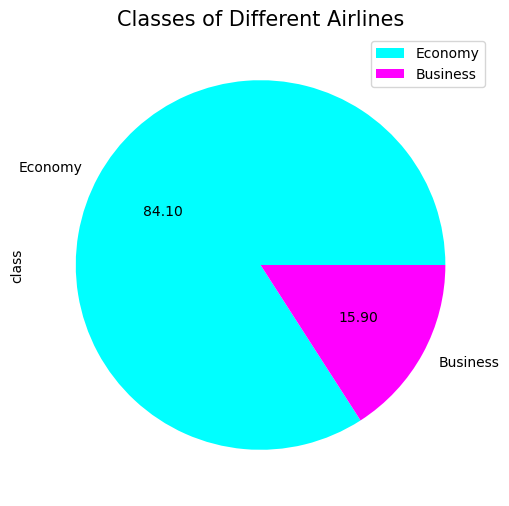

In [39]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Most of the flights has economy class than buisness class

Does price vary with Airlines?

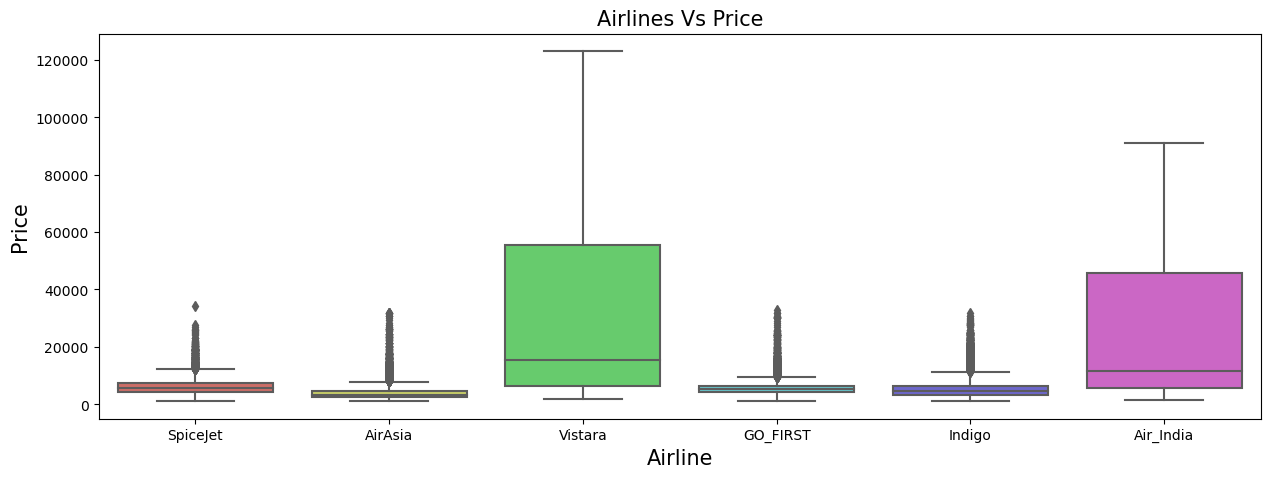

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

vistara and air india vary in prices largely

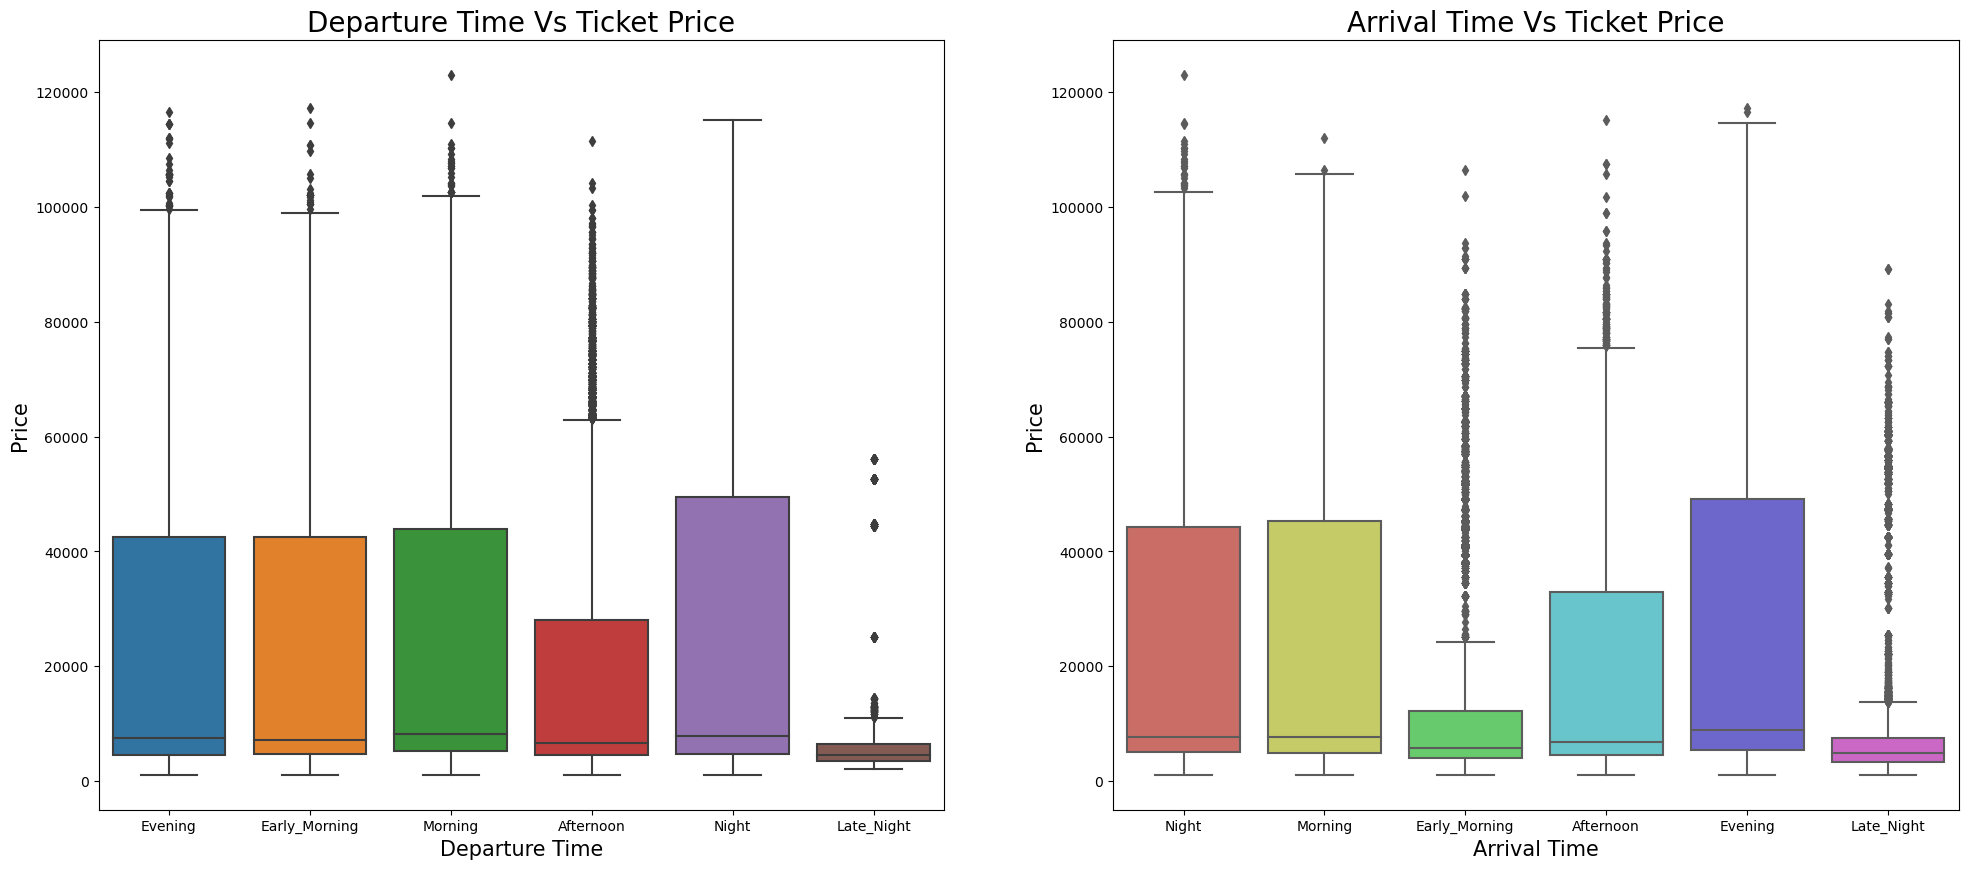

In [41]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

the ticket price is more for the flights which are having the arrival time at night
the ticket price is almost same for the fligjts which are havingf the departure time as morining and early morning
Ticket Price is More for the Flights when the Arrival Time is at Evening
Ticket Price is almost equal for flights Having Arrival time is at Morning and Nigh

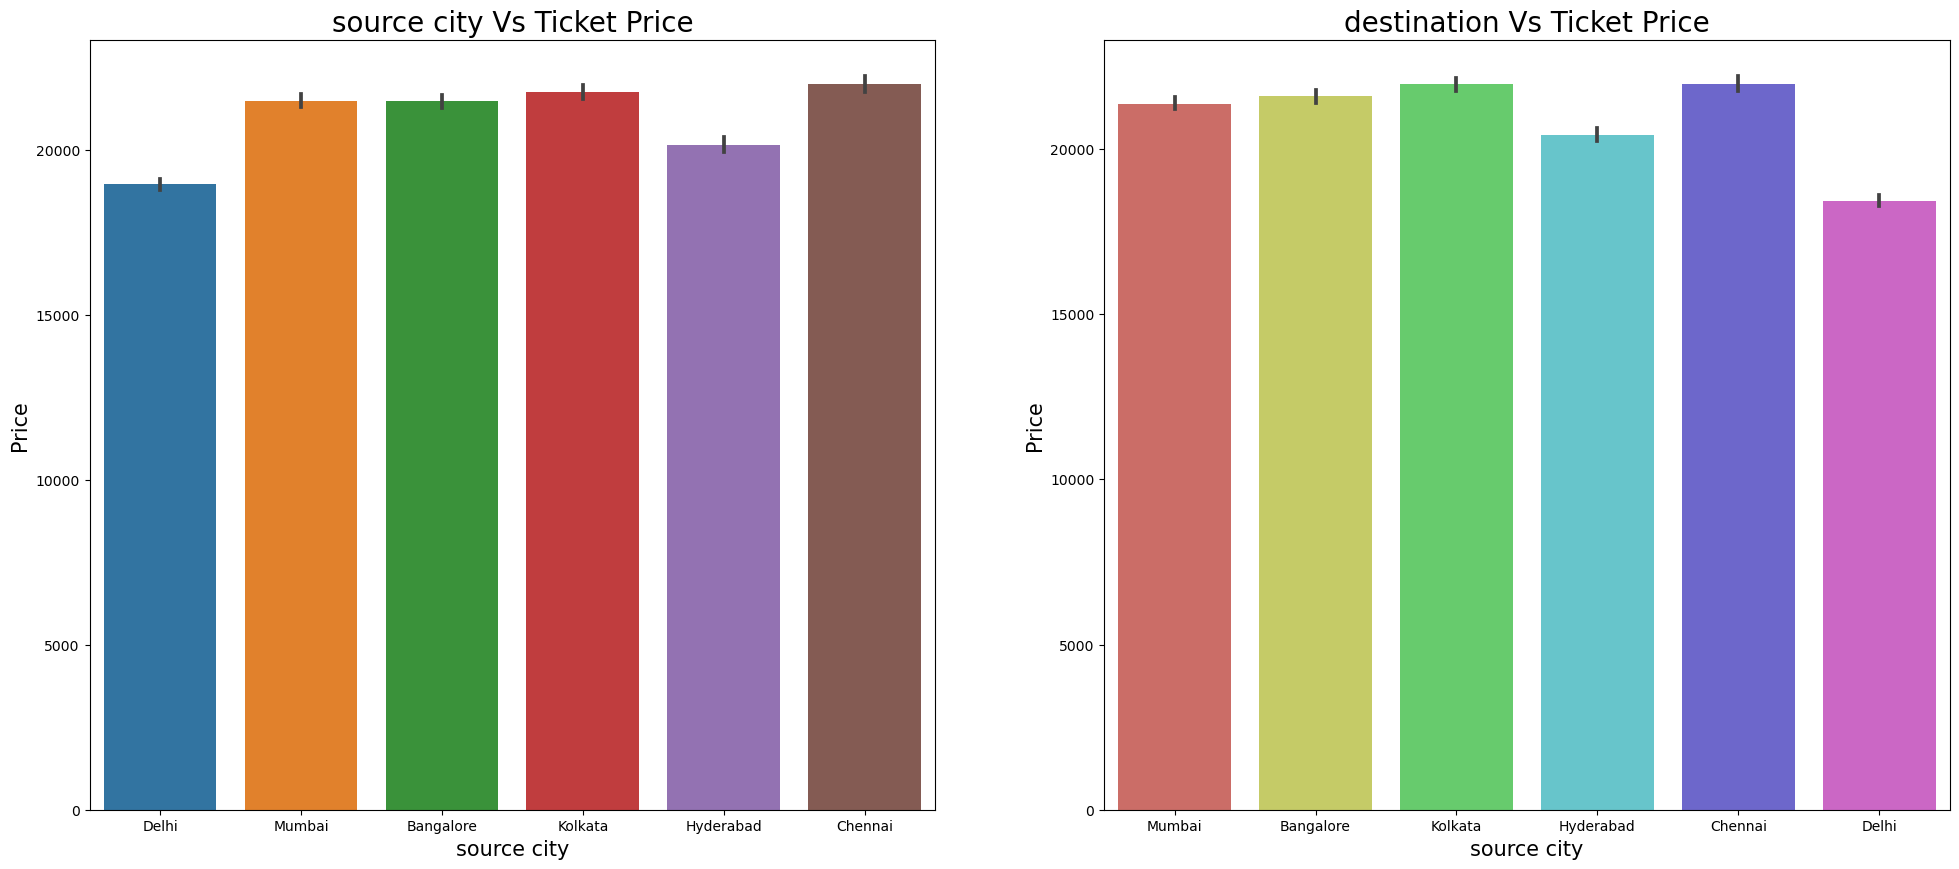

In [42]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.barplot(x='source_city',y='price',data=df)
plt.title('source city Vs Ticket Price',fontsize=20)
plt.xlabel('source city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('destination Vs Ticket Price',fontsize=20)
plt.xlabel('source city',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

flight ticket is more when the source city is chennai and it is cheap for the delhi
flight ticket is when the destination city is chennai and is low foe delhi

In [43]:
df['airline']


0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object

df['airline]
df

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 29.8+ MB


In [45]:
data={
    'source_city':[]

}

In [46]:
df.head(70)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,Vistara,UK-817,Delhi,Evening,one,Night,Mumbai,Economy,28.17,1,14093
66,66,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Economy,28.25,1,14093
67,67,Indigo,6E-2338,Delhi,Afternoon,one,Night,Mumbai,Economy,8.00,1,13767
68,68,GO_FIRST,G8-237,Delhi,Afternoon,one,Night,Mumbai,Economy,9.25,1,13932


In [47]:
df.skew()

C:\Users\Msc 1\AppData\Local\Temp\ipykernel_3748\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Unnamed: 0    0.000000
duration      0.602899
days_left    -0.035464
price         1.061377
dtype: float64

In [48]:
df["price"]

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [49]:
price=np.log(df["price"])
print(price)
print(price.skew())

0          8.691651
1          8.691651
2          8.692154
3          8.691986
4          8.691986
            ...    
300148    11.145695
300149    11.252923
300150    11.278456
300151    11.309401
300152    11.309401
Name: price, Length: 300153, dtype: float64
0.40440314918834797


In [50]:
price=np.sqrt(df["price"])
print(price)
print(price.skew())

0          77.155687
1          77.155687
2          77.175126
3          77.168646
4          77.168646
             ...    
300148    263.182446
300149    277.677871
300150    281.245444
300151    285.630881
300152    285.630881
Name: price, Length: 300153, dtype: float64
0.7916477429659297


In [51]:
price=1/df["price"]
print(price)
print(price.skew())

0         0.000168
1         0.000168
2         0.000168
3         0.000168
4         0.000168
            ...   
300148    0.000014
300149    0.000013
300150    0.000013
300151    0.000012
300152    0.000012
Name: price, Length: 300153, dtype: float64
1.3335390600539345


In [52]:
duration=np.sqrt(df["price"])
print(duration)
print(duration.skew())

0          77.155687
1          77.155687
2          77.175126
3          77.168646
4          77.168646
             ...    
300148    263.182446
300149    277.677871
300150    281.245444
300151    285.630881
300152    285.630881
Name: price, Length: 300153, dtype: float64
0.7916477429659297


In [53]:
Price_boxcox, price_lambda = sp.stats.boxcox(df['price'])
print(price_lambda)

-0.24834494905472682


In [54]:
Price_boxcox = ((((df['price'])**price_lambda) - 1) / price_lambda)
print(Price_boxcox)
print(Price_boxcox.skew())

0         3.561598
1         3.561598
2         3.561656
3         3.561637
4         3.561637
            ...   
300148    3.773828
300149    3.780472
300150    3.782028
300151    3.783901
300152    3.783901
Name: price, Length: 300153, dtype: float64
0.1130734695419832


In [55]:
duration_boxcox, duration_lambda = sp.stats.boxcox(df['duration'])
print(duration_lambda)

0.4829246270121536


In [71]:
duration_boxcox = ((((df['price'])**duration_lambda) - 1) / duration_lambda)
print(duration_boxcox)
print(duration_boxcox.skew())

0         135.660875
1         135.660875
2         135.694390
3         135.683219
4         135.683219
             ...    
300148    448.459565
300149    472.404093
300150    478.290623
300151    485.523143
300152    485.523143
Name: price, Length: 300153, dtype: float64
0.7812947768675217


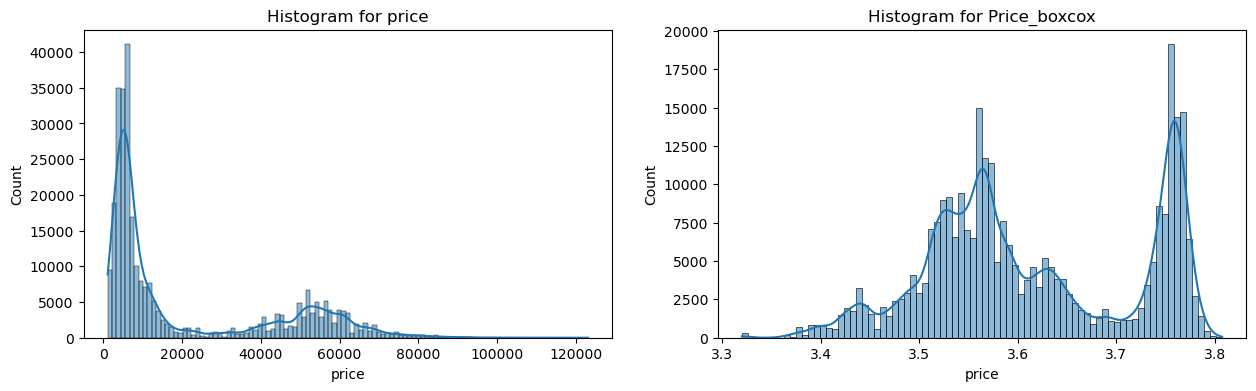

In [56]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(x="price", data = df, kde = True)
plt.title("Histogram for price")
plt.subplot(1,2,2)
sns.histplot(x = Price_boxcox, data=Price_boxcox, kde = True)
plt.title("Histogram for Price_boxcox")
plt.show()


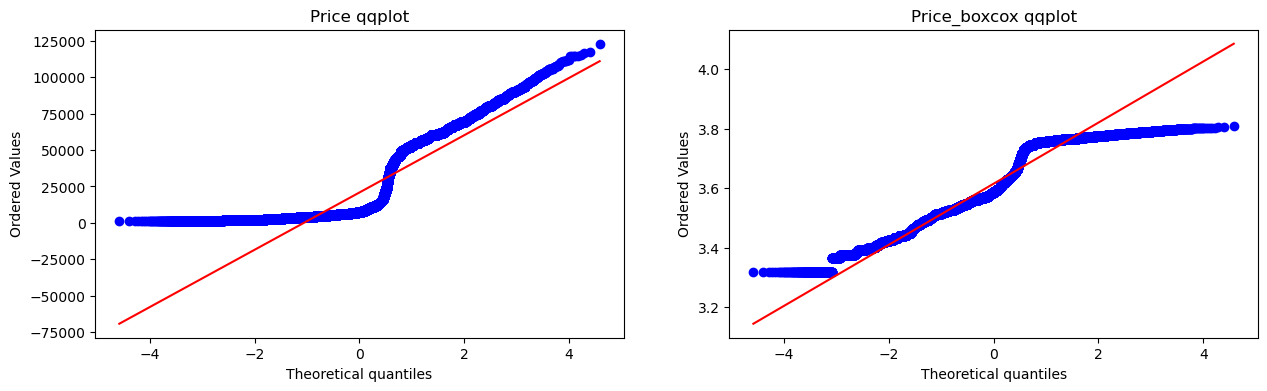

In [57]:
ig,axes = plt.subplots(1,2,figsize=(15,4))
sp.stats.probplot(df['price'], plot = axes[0])
axes[0].set_title("Price qqplot")
sp.stats.probplot(Price_boxcox, plot = axes[1])
axes[1].set_title("Price_boxcox qqplot")
plt.show()

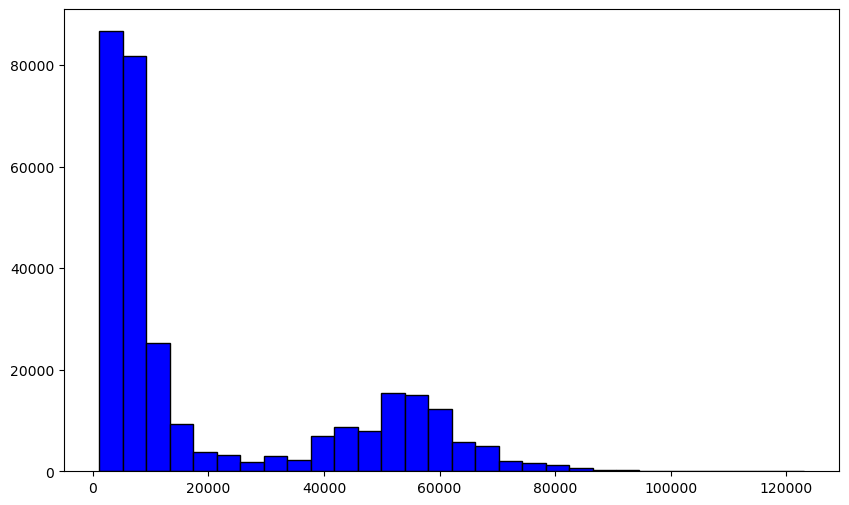

In [58]:
# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.show()

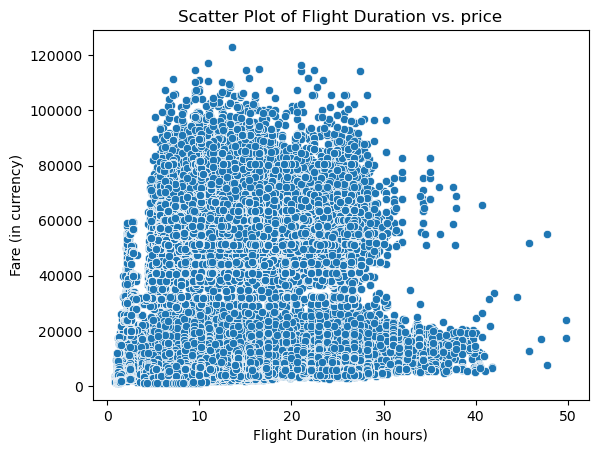

In [59]:
sns.scatterplot(x='duration', y='price', data=df)
plt.title('Scatter Plot of Flight Duration vs. price')
plt.xlabel('Flight Duration (in hours)')
plt.ylabel('Fare (in currency)')
plt.show()

Positive Correlation:

If the scatterplot shows a generally upward trend, it suggests a positive correlation between flight duration and price. This means that longer flights tend to be more expensive. This could be due to factors like fuel costs, crew expenses, and the overall operational expenses associated with longer flights.

No Correlation:

If the points on the scatterplot seem randomly distributed with no clear trend, it suggests that there is no significant correlation between flight duration and price. Other factors might have a more dominant impact on ticket prices.

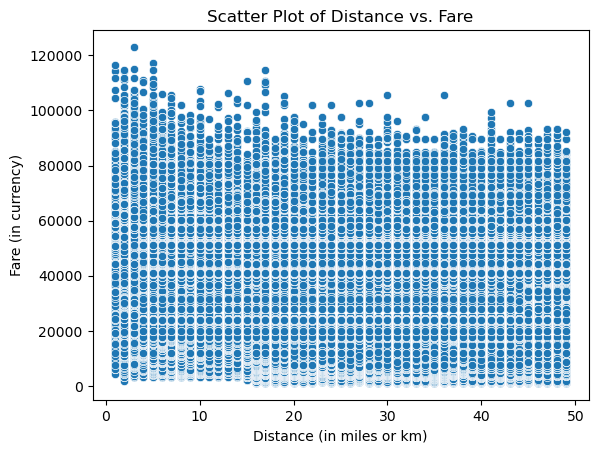

In [60]:
sns.scatterplot(x='days_left', y='price', data=df)
plt.title('Scatter Plot of Distance vs. Fare')
plt.xlabel('Distance (in miles or km)')
plt.ylabel('Fare (in currency)')
plt.show()

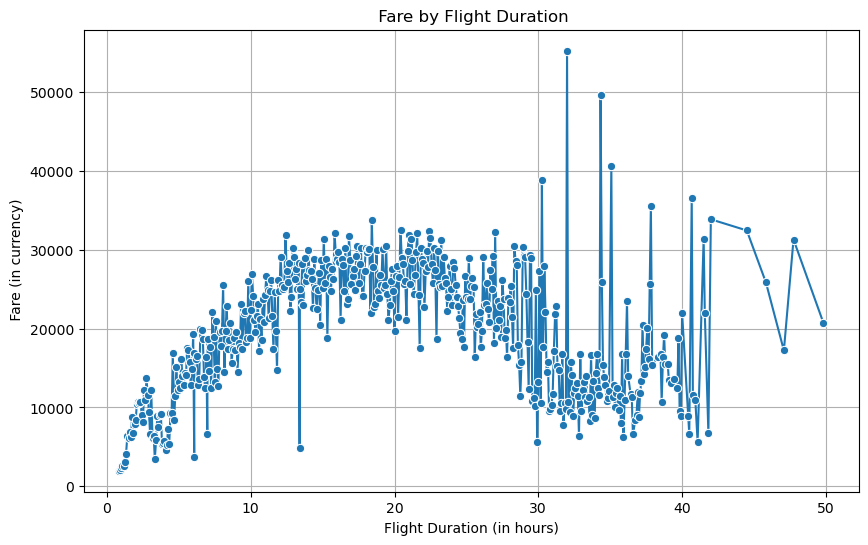

In [61]:


# You may want to group the data by duration and calculate the average fare for each duration
average_fare_by_duration = df.groupby('duration')['price'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='duration', y='price', data=average_fare_by_duration, marker='o')
plt.title(' Fare by Flight Duration')
plt.xlabel('Flight Duration (in hours)')
plt.ylabel(' Fare (in currency)')
plt.grid(True)
plt.show()

If the line slopes upward, it indicates that, on average, longer flights have higher fares.
If the line is relatively flat, there may not be a strong relationship between flight duration and average fare.

C:\Users\Msc 1\AppData\Local\Temp\ipykernel_3748\2820553902.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


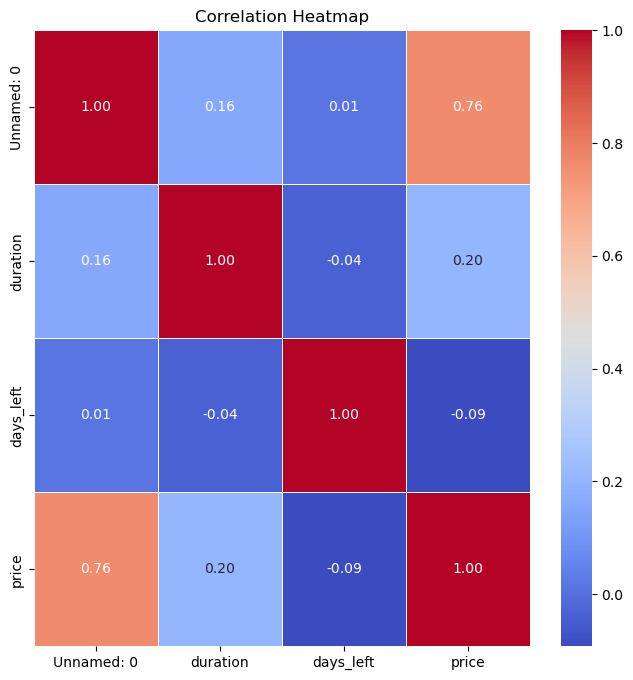

In [62]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
features=["duration","days_left","price"]
normal_df=pd.DataFrame()
for col in features:
    feat,lamda=sp.stats.boxcox(df[col])
    feat_boxcox=(((df[col])**lamda)-1/lamda)
    normal_df[col]=feat_boxcox

normal_df

,duration,days_left,price
0,-0.616983,-0.288457,4.142152
1,-0.566171,-0.288457,4.142152
2,-0.616983,-0.288457,4.142138
3,-0.591344,-0.288457,4.142143
4,-0.566171,-0.288457,4.142143
...,...,...,...
300148,0.981363,19.213670,4.089446
300149,1.030652,19.213670,4.087796
300150,1.485033,19.213670,4.087410
300151,0.969641,19.213670,4.086945


In [64]:
def confidence(df,alpha,col):
    l=(df[col].mean()+(stats.t.ppf(alpha/2,len(df[col])-1)*(df[col].std()/np.sqrt(len(df[col])))))
    u=(df[col].mean()+(stats.t.ppf(alpha/2,len(df[col])-1)*(df[col].std()/np.sqrt(len(df[col])))))

    print("For {col}:".format(col=col))
    print(l,u)
    

In [65]:
for col in features:
    confidence(normal_df,0.05,col)

For duration:
1.1139471475580858 1.1139471475580858
For days_left:
10.879280870056727 10.879280870056727
For price:
4.128775028496842 4.128775028496842


In [66]:
def confidence_sigma(df,alpha,col):
    l=(len(df[col])-1*statistics.stdev(df[col]))/chi.ppf((alpha/2)),len(df[col]-1)
    l=(len(df[col])-1*statistics.stdev(df[col]))/chi.ppf((alpha/2)),len(df[col]-1)

In [67]:
x=np.random.normal(5,4,10)

In [68]:
mean_price=df["price"].mean()
mean_price


20889.660523133203

 Test whether there is a significant difference in ticket prices for short-duration flights compared to long-duration flights using a two-sample Z-test. 

In [69]:
mean_price=df["price"].mean()
var=df['price'].var()
n=300153
alpha=0.05
z_calc=(mean_price-5)/ ((var/2)/np.sqrt(n))
z_calc

0.04441835585446083

In [70]:
p_val=2*(1-sp.stats.norm.cdf(np.abs(z_calc)))
print("p-value",p_val)
if p_val<alpha:
    print("Reject the average price of the flight journey is not equal to 20889.660523133203")
else:
    print("accept that the averge price of the flight journey is 20889.660523133203")

p-value 0.9645709302324248
accept that the averge price of the flight journey is 20889.660523133203


$H_0$ : $\mu$ = 20889.660523133203    v/s $H_1$ : $\mu$ $\not=$ 20889.660523133203
      
      